Please fill out the information of your group!

| <p style="text-align: center;">First Name</p>  | <p style="text-align: center;">Family Name</p> | Matr.-No. |
| ---------------------------------------------- | ---------------------------------------------- | -------- |
| <p style="text-align: left">*Nikita*</p>| <p style="text-align: left">*Kolesnichenko*</p> | *k11778609* |
| <p style="text-align: left">*Linda*</p>| <p style="text-align: left">*Ratz*</p> | *k1525947* |


<h2 style="text-align: center">344.063: Special Topics - Natural Language Processing with Deep Learning (SS2022)</h2>
<h1 style="color:rgb(0,120,170)">Assignment 1: Document Classification with word embeddings, CNN, and LSTM</h2>

<div style="background-color:rgb(224, 243, 255)">
<b>Terms of Use</b><br>
This  material is prepared for educational purposes at the Johannes Kepler University (JKU) Linz, and is exclusively provided to the registered students of the mentioned course at JKU. It is strictly forbidden to distribute the current file, the contents of the assignment, and its solution. The use or reproduction of this manuscript is only allowed for educational purposes in non-profit organizations, while in this case, the explicit prior acceptance of the author(s) is required.

**Author:** Navid Rekab-saz<br>
**Email:** navid.rekabsaz@jku.at<br>

</div>

<h2>Table of contents</h2>
<ol>
    <a href="#section-general-guidelines"><li style="font-size:large;font-weight:bold">General Guidelines</li></a>
    <a href="#section-classification-framework"><li style="font-size:large;font-weight:bold">Task A: PyTorch Framework for Document Classification (5 points)</li></a>
    <a href="#section-classification-cnn"><li style="font-size:large;font-weight:bold">Task B: Document Classification with CNN (10 points)</li></a>
    <a href="#section-classification-rnn"><li style="font-size:large;font-weight:bold">Task C: Document Classification with LSTM (10 points)</li></a>
    
</ol>

<a name="section-general-guidelines"></a><h2 style="color:rgb(0,120,170)">General Guidelines</h2>

<div style="background-color:rgb(224, 243, 255)">

### Assignment objective
The aim of this assignment is to implement a document (sentence) classification model with PyTorch, particularly by using Convolutional Neural Networks (CNN) and Long Short-Term Memory (LSTM). The assignment in total has **25 points**.

This Notebook encompasses all aspects of the assignment, namely the descriptions of tasks as well as your solutions and reports. Feel free to add any required cell for solutions. The cells can contains code, reports, charts, tables, or any other material, required for the assignment. Cover the questions/points, mentioned in the tasks, but also add any necessary point for understanding your experiments. Try to provide the solutions in a clear, and visual way! 

Please discuss any unclear point in the assignment in the provided forum in MOODLE. It is also encouraged to provide answers to your peer's questions. However when submitting a post, keep in mind to avoid providing solutions. Please let the author(s) know shall you find any error or unclarity in the assignment.

</div>

<div style="background-color:rgb(224, 243, 255)">

### Libraries & Dataset

The assignment should be implemented with recent versions of `Python` (>3.7) and `PyTorch` (>1.7). Any standard Python library can be used, so far that the library is free and can be simply installed using `pip` or `conda`. Examples of potentially useful libraries are `transformer`, `scikit-learn`, `numpy`, `scipy`, `gensim`, `nltk`, `spaCy`, and `AllenNLP`. Use the latest stable version of each library.

To conduct the experiments, two datasets are provided. The datasets are taken from the data of `thedeep` project, produced by the DEEP (https://www.thedeep.io) platform. The DEEP is an open-source platform, which aims to facilitate processing of textual data for international humanitarian response organizations. The platform enables the classification of text excerpts, extracted from news and reports into a set of domain specific classes. The provided dataset has 12 classes (labels) like agriculture, health, and protection. 

The difference between the datasets is in their sizes. We refer to these as `medium` and `small`, containing an overall number of 38,000 and 12,000 annotated text excerpts, respectively. Select one of the datasets, and use it for all of the tasks. `medium` provides more data and therefore reflects a more realistic scenario. `small` is however provided for the sake of convenience, particularly if running the experiments on your available hardware takes too long. Using `medium` is generally recommended, but from the point of view of assignment grading, there is no difference between the datasets.

Download the dataset from [this link](https://drive.jku.at/filr/public-link/file-download/0cce88f07f0df27c017f8ea132693d61/38160/1583790728782872458/nlpwdl2022_data.zip).

Whether `medium` or `small`, you will find the following files in the provided zip file:
- `thedeep.$name$.train.txt`: Train set in csv format with three fields: sentence_id, text, and label.
- `thedeep.$name$.validation.txt`: Validation set in csv format with three fields: sentence_id, text, and label.
- `thedeep.$name$.test.txt`: Test set in csv format with three fields: sentence_id, text, and label.
- `thedeep.$name$.label.txt`: Captions of the labels.
- `README.txt`: Terms of use of the dataset.

</div>


<div style="background-color:rgb(224, 243, 255)">

### Submission

Each group should submit the following two files:

- One Jupyter Notebook file (`.ipynb`), containing all the code, results, visualizations, etc. **In the submitted Notebook, all the results and visualizations should already be present, and can be observed simply by loading the Notebook in a browser.** The Notebook must be self-contained, meaning that (if necessary) one can run all the cells from top to bottom without any error. Do not forget to put in your names and student numbers in the first cell of the Notebook. 
- The HTML file (`.html`) achieved from exporting the Jupyter Notebook to HTML (Download As HTML).

You do not need to include the data files in the submission.


</div>

<div style="background-color:rgb(224, 243, 255)">

### Publishing Experiments Results

It is encouraged that you log and store any information about the training and evaluation of the models in an ML dashboard like [`TensorBoard`](https://www.tensorflow.org/tensorboard) or [`wandb`](https://wandb.ai/site). This can contain any important aspect of training such as the changes in the evaluation results on validation, training loss, or learning rate. 

To this end, in the case of `TensorBoard`, after finalizing all experiments and cleaning any unnecessary experiment, publish the log files results through [`TensorBoard.dev`](https://tensorboard.dev). A simple way of doing it is by running the following command in the folder of log files:

`tensorboard dev upload --name my_exp --logdir path/to/output_dir`

`TensorBoard.dev` uploads the necessary files and provides a URL to see the TensorBoard's console. Insert the URL in the cell below.

</div>


**URL :** https://tensorboard.dev/experiment/1byiMJsdTOa2sG4f6pVy8w/

<a name="section-classification-framework"></a><h2 style="color:rgb(0,120,170)">Task A: PyTorch Framework for Document Classification (5 points)</h2>

<div style="background-color:rgb(224, 243, 255)">

The formulation of this task is identical to the Assignment 3 of UE Natural Language Processing course. In this task, you implement a document classification model, which given a document/sentence, predicts the corresponding class. The PyTorch model in this task should be called **`ClassificationAverageModel`** in your code.

Given a document, first each word is mapped to its corresponding vector. Then, the word vectors are composed to create the embedding of the document using the *element-wise mean* of the word vectors. Formally, given the document $d$, consisting of words $\left[ v_1, v_2, ..., v_{|d|} \right]$, the document representation $\mathbf{e}_d$ is defined as:

<center><div>$\mathbf{e}_d = \frac{1}{|d|}\sum_{i=1}^{|d|}{\mathbf{e}_{v_i}}$</div></center>

where $\mathbf{e}_{v}$ is the vector of the word $v$, and $|d|$ is the length of the document. This document embedding is finally used as features to predict the class (label) of the document. The implementation of the classification model should cover the following points.


    
**Preprocessing, Dictionary, and Word Embedding Lookup (1 point):** Load the train, validation, and test sets. Apply necessary preprocessing steps based on your judgement. Tokenize the preprocessed text. Use the processed tokens of the training set to create a dictionary of vocabularies. Reduce the size of dictionary using a proper method, for instance by considering a cut-off threshold on the tokens with low frequencies. When removing tokens from the dictionary, consider a strategy for handling Out-Of-Vocabulary (OOV) tokens, namely the ones in the train/validation/test datasets that that are not anymore in the dictionary. Some possible strategies could be to remove OOVs from the texts, or to replace them with a special token like <OOV>. After then, create a lookup for the embeddings of all the words in the dictionary. The lookup is an embedding matrix, which maps the ID of each word to a corresponding vector. Use the pre-trained vectors of a word embedding model (like [`word2vec`](https://code.google.com/archive/p/word2vec/) or [`GloVe`](https://nlp.stanford.edu/projects/glove/)) to initialize the word embeddings of the lookup. Keep in mind that the embeddings of the words in the lookup should be matched with the correct vector in the pretrained word embedding. If the vector of a word in the lookup does not exist in the pretrained word embeddings, the corresponding vector should be initialized randomly. The word embeddings of the classification model are trainable, meaning that the word vectors get updated end-to-end with the other parameters of the model.

**Data Batching and Forward Pass (1 point):** Create batches for any given dataset (train/validation/test). Each batch is a two-dimensional matrix of *batch-size* to *max-document-length*, consisting of the ids of the words in documents. *Batch-size* and *max-document-length* are two hyper-parameters of the model. Next, given a batch, the model fetches the corresponding embeddings, and use them to calculate the document embeddings according to the formulation above. These document embeddings are then exploited to predict the probability distributions of the output classes using a linear projection, followed by a softmax layer.

**Loss Function, Optimization, Early Stopping, and Evaluation (1.5 point):** Loss between the predicted and the actual classes is calculated using Negative Log Likelihood. Feel free to use any optimization mechanism such as Adam. After each epoch, evaluate the model on the *validation set* using the <ins>accuracy metric</ins>. If the evaluation result improves, save the model as the best performing one so far. If the results are not improving after a certain number of evaluation rounds (set as another hyper-parameter) or if training reaches a certain number of epochs, the training procedure can be terminated. After finishing the training, load the best performing model, and use it to predict the classes of the data points in the test set. To evaluate the models, use the <ins>accuracy metric</ins> throughout the task.

**Overall functionality of the model (1 point)**

**Reporting (0.5 point)** During loading and processing the collection, provide sufficient information and examples about the data and the applied processing steps. Report the results of the best performing model on the validation and test set in a table. Additionally, feel free to add any plot showing the results.

</div>

## Using implementation from Assignment 3 from last semester's exercises.

In [40]:
from typing import List

import pandas as pd
import numpy as np

from torch.utils.data import DataLoader, Dataset
import torch

import ast
import gensim
import gensim.downloader
import spacy

import torch.nn.functional as F

from a1_preproc import *  # using preprocessing functions from previous year

glove = gensim.downloader.load('glove-wiki-gigaword-200')

## Preprocessing, Dictionary, and Word Embedding Lookup 

### Using preprocessed datasets (which were preprocessed using functionality from Assignment 1 and 3) from last year

### All cleaning/lemmatizing/vocab creating steps

```
THRESHOLD = 25

add_headers('data/thedeep.small.test.txt'), add_headers('data/thedeep.small.train.txt'), add_headers('data/thedeep.small.validation.txt')
train_df, test_df, val_df = pd.read_csv('thedeep.small.train_processed.txt'), pd.read_csv('thedeep.small.test_processed.txt'), pd.read_csv('thedeep.small.validation_processed.txt')

train_text_series = train_df.iloc[:, 1]
nlp = spacy.load('en_core_web_md')  # load spacy nlp vocab

train_df_copy, test_df_copy, val_df_copy = copy.deepcopy(train_df), copy.deepcopy(test_df), copy.deepcopy(val_df)

train_df_copy.iloc[:, 1] = train_df_copy.iloc[:, 1].apply(lambda x: process(x, nlp))
test_df_copy.iloc[:, 1] = test_df_copy.iloc[:, 1].apply(lambda x: process(x, nlp))
val_df_copy.iloc[:, 1] = val_df_copy.iloc[:, 1].apply(lambda x: process(x, nlp))

train_vocab_reduced, train_counts_reduced = create_count_vocab(train_df_copy.iloc[:, 1])
test_vocab_reduced, test_counts_reduced = create_count_vocab(test_df_copy.iloc[:, 1])
val_vocab_reduced, val_counts_reduced = create_count_vocab(val_df_copy.iloc[:, 1])

_, train_vocab = substitute_oov(train_df_copy.iloc[:, 1], train_vocab_reduced, train_counts_reduced)

train_df_copy.to_csv('data/preproc_train_set.csv'), test_df_copy.to_csv('data/preproc_test_set.csv'), val_df_copy.to_csv('data/preproc_val_set.csv')
pd.DataFrame({'vocab':train_vocab}).to_csv('preproc_vocab.csv')
```

### Since all the steps from previous cell load for quite a while, it was commented and file produced by that cell were further used in the notebook

In [7]:
def get_word_index(ds):
    '''
    Function to remove words that are not present in the GloVe dataset 
    and at the same time convert each word into corresponding index.
    
    Returns:
    - np.array, preprocessed and reduced vectorized dataset
    - list, reduced words dataset
    - list, OOV words list
    - list, indexes of words that are not present in the pretrained model
    '''
    
    func = lambda word : glove.get_index(word)
    vec_func = lambda word : glove.get_vector(word, norm=True)
    preproc, words, oovs, idcs = [], [], [], []

    for e,i in enumerate(ds):
        
        try:
            k = i.tolist()
            k = [func(x) for x in i]
            preproc.append(k)
            words.append(i)
        except:
            idcs.append(e)
            oovs.append(i)
            continue
            
    return np.array(preproc), words, oovs, idcs

dataset_train, dataset_test, dataset_val = pd.read_csv('data/preproc_train_set.csv'),pd.read_csv('data/preproc_test_set.csv'),pd.read_csv('data/preproc_val_set.csv')

vocab = pd.read_csv('data/preproc_vocab.csv').iloc[:, -1].to_numpy()
vocab = np.expand_dims(vocab, -1) # expanding dimensions to fit into function

word_to_idx = lambda word : glove.get_index(word)
convert_to_lst = lambda x: ast.literal_eval(x)

preproc_vocab, words_vocab, oovs_vocab, idcs_vocab = get_word_index(vocab)
print(preproc_vocab.shape)
preproc_vocab = np.squeeze(preproc_vocab, axis=1) # squeezing back for further processing

idx_vocab = {k[0]:v for k,v in zip(vocab, preproc_vocab)}
idx2vec = {}

len(vocab)

(1876, 1)


1935

In [8]:
veccs = dict()
word2idx = dict()
ctr = 1

for word in vocab.squeeze():
    try:
        vec = glove.get_vector(word, norm=True)
        veccs[ctr] = vec
        word2idx[word] = ctr
        ctr += 1
    except:
        vec = rand_init = np.random.uniform(-1, 1, size=(200)).astype(np.float32)
        veccs[ctr] = vec
        word2idx[word] = ctr
        ctr += 1

embeddings = np.asarray(list(veccs.values()))
print(embeddings.shape, glove.get_normed_vectors().shape)

def sentence_to_idcs(x):
    for i in range(len(x)):
        if x[i] in word2idx.keys():
            x[i] = word2idx[x[i]]
            x[i] = int(x[i])
        else:
            x[i] = 0  # workaround for LongTensor conversion, assign 1936 to every unknown word
    return np.array(x)

train_x_preproc, train_y,  = dataset_train.iloc[:, -2], dataset_train.iloc[:, -1]
test_x_preproc, test_y,  = dataset_test.iloc[:, -2], dataset_test.iloc[:, -1]
val_x_preproc, val_y,  = dataset_val.iloc[:, -2], dataset_val.iloc[:, -1]

train_x_preproc, test_x_preproc, val_x_preproc = train_x_preproc.apply(convert_to_lst), test_x_preproc.apply(convert_to_lst), val_x_preproc.apply(convert_to_lst)
train_x_preproc, test_x_preproc, val_x_preproc = train_x_preproc.apply(sentence_to_idcs), test_x_preproc.apply(sentence_to_idcs), val_x_preproc.apply(sentence_to_idcs)

(1935, 200) (400000, 200)


In [9]:
print(train_x_preproc)

0       [1, 2, 3, 4, 5, 0, 6, 7, 1, 8, 9, 10, 9, 8, 4,...
1       [29, 30, 10, 31, 32, 33, 34, 35, 36, 37, 38, 0...
2       [42, 43, 44, 45, 46, 0, 47, 48, 49, 50, 51, 52...
3       [29, 63, 64, 65, 66, 67, 68, 40, 0, 29, 69, 70...
4       [0, 102, 103, 104, 105, 63, 106, 107, 108, 109...
                              ...                        
8395    [0, 1513, 525, 579, 40, 124, 81, 1419, 0, 80, ...
8396    [34, 104, 1802, 1302, 652, 1803, 387, 0, 170, ...
8397    [509, 0, 0, 0, 582, 374, 0, 0, 237, 1797, 0, 5...
8398    [62, 131, 126, 560, 0, 257, 337, 475, 476, 857...
8399    [249, 1408, 69, 512, 60, 1435, 541, 249, 430, ...
Name:  text, Length: 8400, dtype: object


## Dataset, Data Batching

In [10]:
class CustomDataset(Dataset):
    def __init__(self, text, labels, max_doc_size=50):
        # assert both text and labels arrays are pd.Series type
        # additionally check whether max_doc_size is equal or more than 50
        assert type(text) == pd.Series, f'Expected text input to be of type pd.Series, received type {type(text)}'
        assert type(labels) == pd.Series, f'Expected labels input to be of type pd.Series, received type {type(labels)}'
        assert max_doc_size >= 50, 'Please provide max_doc_size value more than 50'
        
        self.func = lambda x: int(x) if x.isdigit() else x
        self.labels = labels.values
        self.text = text
        self.max_doc_size = max_doc_size
        
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        label = self.labels[idx]
        text = self.text[idx]
        # convert 
        text = text[:self.max_doc_size]
        sample = (torch.LongTensor(text), label)
        return sample
    
    def all_classes(self):
        return torch.tensor(sorted(list(set(self.labels))))

train_dataset, test_dataset, val_dataset = CustomDataset(train_x_preproc, train_y), \
                                           CustomDataset(test_x_preproc, test_y), \
                                           CustomDataset(val_x_preproc, val_y)


In [11]:
from torch.nn.utils.rnn import pad_sequence

def batch_fn(batch):
    data = [item[0] for item in batch]
    data = pad_sequence(data, batch_first=True)
    targets = [item[1] for item in batch]
    return [data, torch.tensor(targets)]

In [12]:
# convert word embeddings to FloatTensor
glove_floated = torch.FloatTensor(embeddings)

# unfreeze the parameters to make them trainable, specify padding idx
embed_table = torch.nn.Embedding(num_embeddings=glove_floated.shape[0], embedding_dim=glove_floated.shape[1], padding_idx=0)
embed_table.weight.data.copy_(glove_floated)

tensor([[-0.0606, -0.1469, -0.0192,  ..., -0.1552,  0.0030, -0.0999],
        [-0.0108,  0.2173,  0.0101,  ...,  0.0288,  0.0087,  0.0506],
        [ 0.0702,  0.0575,  0.0976,  ...,  0.0433, -0.0173, -0.0376],
        ...,
        [ 0.5156, -0.3140,  0.0241,  ..., -0.2808, -0.7307,  0.1422],
        [ 0.0519,  0.0070,  0.1161,  ...,  0.0353, -0.1273, -0.0556],
        [ 0.0970, -0.0817, -0.0451,  ..., -0.0259, -0.0851,  0.0646]])

In [13]:
## Hyperparameters ##
BATCH_SIZE = 64
LR = 0.02
ES_PATIENCE = 5
DEVICE = torch.device("cuda:0") if torch.cuda.is_available() else torch.device('cpu')
DEVICE

device(type='cuda', index=0)

In [14]:
def batched_sentence_lookup(batch, embeddings=embed_table, use_device=False):
    ''' 
    Accepts batch of data, looks up for the word embeddings in the lookup table
    Converts indeces to embeddings and create a new generated batch of word embeddings
    Inputs:
    - batch (tensor), batch of data
    - embeddings (torch.nn.Embedding), embedding lookup table
    Returns:
    - generated_batch (tensor), tensor of the same size as input batch,
      but with additional dimension (batch_size X document_size X embeddings_dim)
    '''
    generated_batch = []
    for word_ids in batch:
        result = []
        
        for word_id in word_ids:
            if word_id == torch.tensor(1936) or word_id == torch.tensor(1935):  # catch the unknown words
                rand_init = np.random.uniform(-1, 1, size=(200)).astype(np.float32)
                rand_init = torch.tensor(rand_init, requires_grad=True).float().to(DEVICE) if use_device \
                else torch.tensor(rand_init, requires_grad=True).float()
                result.append(rand_init)
            else:
                try:
                    result.append(embeddings(word_id))
                except IndexError:
                    print(word_id)  # Debug purposes
                    
        res = torch.vstack(result).to(DEVICE) if use_device else torch.vstack(result)   
        generated_batch.append(res)
        
    generated_batch = torch.stack(generated_batch)
    if use_device:
        generated_batch = generated_batch.to(DEVICE)
        
    return generated_batch

In [15]:
def calculate_average_document_vec(x):
    return (torch.sum(x, dim=1) / x.shape[1])


class ClassificationAverageModel(torch.nn.Module):
    def __init__(self, use_device):
        super(ClassificationAverageModel, self).__init__()
        
        self.use_device = use_device
        self.embeddings = torch.nn.Embedding(num_embeddings=glove_floated.shape[0], 
                                             embedding_dim=glove_floated.shape[1],
                                             padding_idx=0)
        self.embeddings.weight.data.copy_(glove_floated)
            
        embedding_dim = self.embeddings.weight.shape[1]
        self.linear1 = torch.nn.Linear(embedding_dim, 128)
        self.linear2 = torch.nn.Linear(128, len(train_dataset.all_classes()))
    
    def forward(self, x):
        embed_batch = batched_sentence_lookup(x, self.embeddings, self.use_device)
        averaged = calculate_average_document_vec(embed_batch)
        out = self.linear1(averaged)
        out = self.linear2(out)
        return F.softmax(out)
    
model = ClassificationAverageModel(False)    

In [16]:
train_dloader = DataLoader(train_dataset, batch_size = BATCH_SIZE, drop_last=False, shuffle=True, collate_fn=batch_fn)
val_dloader = DataLoader(val_dataset, batch_size = BATCH_SIZE, drop_last=False, shuffle=False, collate_fn=batch_fn)
test_dloader = DataLoader(test_dataset, batch_size = BATCH_SIZE, drop_last=False, shuffle=False, collate_fn=batch_fn)

### Loss Function, Optimization, Early Stopping, and Evaluation 

In [46]:
class TrainLoop:
    def __init__(self, patience=ES_PATIENCE, delta=0.0, save_path='checkpoint.pt', use_device=True):
        '''
        Inputs:
        - patience (int), if acc continuously improves, how long to wait before stopping
        - delta (float), minimal loss difference to qualify as improvement
        - save_path (str), path to save model checkpoint to
        - model (torch.nn.Module), PyTorch model
        - use_device (bool), whether to use cuda cores for computations or not
        '''
        
        self.early_stop = False
        self.delta = delta
        self.path = save_path
        self.device = use_device
        self.patience = patience
        
        self.val_acc_max = np.Inf
        self.counter = 0
        self.best_score = None
        
        self.model = ClassificationAverageModel(use_device)
                
        if self.device:
            self.model = self.model.to(DEVICE)
        
        # loss function and optimizer
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=LR)
        self.criterion = torch.nn.NLLLoss()
        
        self.batch_size = BATCH_SIZE

    
    def early_stopper(self, val_acc):
        """
        Stops the training if validation accuracy doesn't improve after a given patience.
        """
        model = self.model
        score = val_acc

        if self.best_score is None:
            self.best_score = score
            torch.save(model.state_dict(), self.path)
            self.val_acc_max = val_acc
            
        elif score < self.best_score + self.delta:
            self.counter += 1
            print(f'EarlyStopper counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            print(f'Validation accuracy increased ({self.val_acc_max:.6f} --> {val_acc:.6f}).  Saving model ...')
            torch.save(model.state_dict(), self.path)
            self.val_acc_max = val_acc
            self.counter = 0
    
    def evaluate(self, val_dloader, valid_losses):
        
        model = self.model
        
        overall_correct = 0
        model.eval() # evaluate model
        for data, target in val_dloader:
            
            if self.device:
                data, target = data.to(DEVICE), target.to(DEVICE)
            
            output = model(data)
            loss = self.criterion(output, target)
            
            y_hat = torch.argmax(output, dim=1)
            overall_correct += torch.sum(y_hat == target)
            valid_losses.append(loss.item())
            
        return overall_correct / len(val_dloader.dataset)
    
    def test(self, test_dloader):
        # load checkpoint if exists
        
        model = self.model
        
        try:
            model.load_state_dict(torch.load(self.path))
        except FileNotFoundError:
            pass
        
        model.eval() # evaluate model
        
        overall_correct = 0
        for data, target in test_dloader:
            
            if self.device:
                data, target = data.to(DEVICE), target.to(DEVICE)
            
            output = model(data)
            loss = self.criterion(output, target)
            
            y_hat = torch.argmax(output, dim=1)
            overall_correct += torch.sum(y_hat == target)
        
        testing_accuracy = overall_correct / len(test_dloader.dataset)
        print(f'Testing Accuracy: {testing_accuracy:.3f}')
            
        return y_hat

    def train(self, train_dloader, n_epochs=15):
        
        model = self.model
        
        train_losses = []
        valid_losses = []
        test_losses = []
        avg_train_losses = []
        avg_valid_losses = []

        for epoch in range(1, n_epochs + 1):
            overall_correct = 0
            
            model.train()
            for batch, (data, target) in enumerate(train_dloader, 1):
                self.optimizer.zero_grad()
                
                if self.device:
                    data, target = data.to(DEVICE), target.to(DEVICE)
                                
                output = model(data)
                y_hat = torch.argmax(output, dim=1)
                loss = self.criterion(output, target)
                overall_correct += torch.sum(y_hat == target) 
                loss.backward()
                self.optimizer.step()
                
                train_losses.append(loss.item())

            # compute train and val accuracies
            train_accuracy = overall_correct/len(train_dloader.dataset)
            val_accuracy = self.evaluate(val_dloader, valid_losses)

            train_loss = np.average(train_losses)
            valid_loss = np.average(valid_losses)
            avg_train_losses.append(train_loss)
            avg_valid_losses.append(valid_loss)
            
            train_losses, valid_losses = [], []

            print(f'Epoch {epoch}/{n_epochs} | Training Loss: {train_loss:.3f} | Training Accuracy {train_accuracy:.3f} \n',
                  f'Validation Loss: {valid_loss:.3f} | Validation Accuracy: {val_accuracy:.3f}')

            self.early_stopper(val_accuracy)

            if self.early_stop == True:
                print(f"Early stopping occured on epoch {epoch} with latest validation accuracy of {val_accuracy:.3f}")
                break
        
        # compute test accuracy
        test_accuracy = self.test(test_dloader)

train = TrainLoop()

In [22]:
train.train(train_dloader, n_epochs=15)

<ipython-input-19-be0fc5c872ab>:24: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(out)


Epoch 1/15 | Training Loss: -0.43678241093276127 | Training Accuracy 0.4399999976158142 
 Validation Loss: -0.45723759819721355 | Validation Accuracy: 0.4633333384990692
Epoch 2/15 | Training Loss: -0.5120703614119327 | Training Accuracy 0.5134523510932922 
 Validation Loss: -0.4541409642531954 | Validation Accuracy: 0.4555555582046509
EarlyStopper counter: 1 out of 5
Epoch 3/15 | Training Loss: -0.5237325596990008 | Training Accuracy 0.524404764175415 
 Validation Loss: -0.5144083767101683 | Validation Accuracy: 0.5144444704055786
Validation accuracy increased (0.463333 --> 0.514444).  Saving model ...
Epoch 4/15 | Training Loss: -0.5251057398590174 | Training Accuracy 0.526190459728241 
 Validation Loss: -0.512703303633065 | Validation Accuracy: 0.5172222256660461
Validation accuracy increased (0.514444 --> 0.517222).  Saving model ...
Epoch 5/15 | Training Loss: -0.5470232401381839 | Training Accuracy 0.5472618937492371 
 Validation Loss: -0.5125789971187197 | Validation Accuracy: 0

In [23]:
train.test(test_dloader)

<ipython-input-19-be0fc5c872ab>:24: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(out)


Testing Accuracy: 0.5255555510520935:.3f


tensor([10,  9,  4,  3, 11,  3,  3,  4], device='cuda:0')

<a name="section-classification-cnn"></a><h2 style="color:rgb(0,120,170)">Task B: Classification with CNN (10 points)</h2>

<div style="background-color:rgb(224, 243, 255)">

In this task, we implement a document classification model using Convolutional Neural Networks (CNN). This model should be called **`ClassificationCNNModel`** and contains all various variations as described later on. The schematic architecture of `ClassificationCNNModel` is shown in the figure. `ClassificationCNNModel` extends `ClassificationAverageModel` by CNN layers, and is in principle built on top `ClassificationAverageModel`.

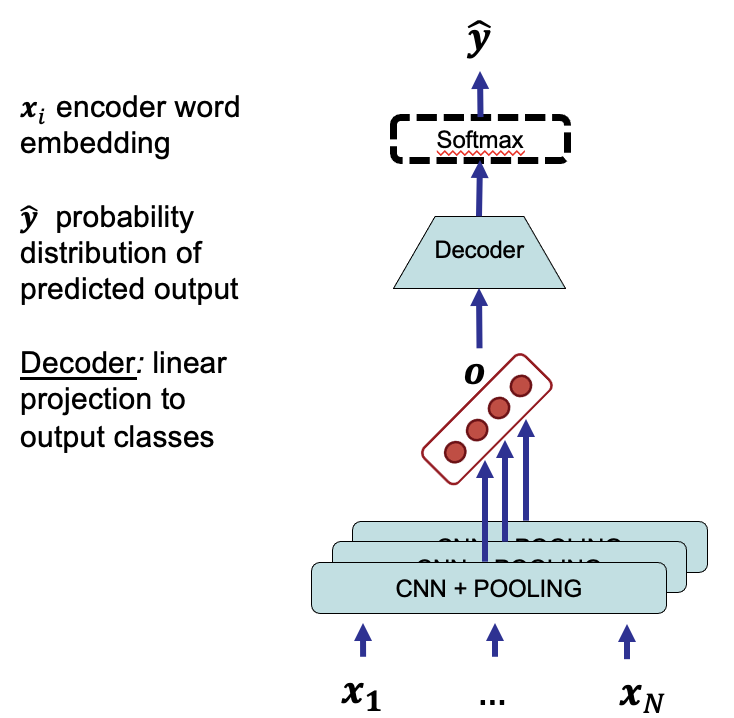

The implementation of `ClassificationCNNModel` covers the following points:

**Baseline model (5 points):** The baseline CNN model first fetches the corresponding embeddings of the word IDs of a given batch. The resulting word embeddings are then passed to three separate CNNs, each followed by a pooling mechanism. The CNNs capture unigram, bigram, and trigram patterns, and have $n_{uni}$, $n_{bi}$, and $n_{tri}$ filters (kernels), respectively. This results in three feature vectors with $n_{uni}$, $n_{bi}$, and $n_{tri}$ dimensions, which are then concatenated to form the document embedding. Finally, the document embedding is used to predict the probability distribution of the output classes by being passed to the decoder (a linear projection) and a softmax layer.

**Model variations (3 points):** Implement the **three variations** of the baseline model as explained below. Each variation applies only one change to the baseline architecture, making it possible to study the effect of the change. The code of all variations should be inside `ClassificationCNNModel`, and executing a variation should be done by simply passing the corresponding parameters of the variation to the model. 

- **Variation 1 - Input Embeddings**. Select (at least) one of these proposed cases:
  - Freeze the weights of the encoder word embeddings (no updates)
  - Initialize the encoder word embeddings randomly instead of using pretrained embeddings. 

- **Variation 2 - Regularization & Optimization**. Select (at least) one of these proposed cases:
  - Apply dropout to the final feature vector and tune the dropout rate.
  - Add L2 weight regularization to the loss function and tune its coefficient.
  - Use SGD instead of Adam.

- **Variation 3 - CNNs**. Select (at least) one of these proposed cases:
  - Increase/decrease the size of the output channel of the CNNs.
  - Experiment with various paddings and/or strides.
  - Add CNNs that capture larger n-grams (>3) and/or remove some of the current CNNs.


**Reporting and discussion (2 points)** Report the evaluation results of the baseline model, as well as the ones for all the variations in a table and also in a plot. Discuss which variation(s) appear to be the most effective. Explain your take.


</div>

### Copying imports for second tasks to reduce loading time when executing only part of notebook

In [17]:
from typing import List

import pandas as pd
import numpy as np

from torch.utils.data import DataLoader, Dataset
import torch
from torch.utils.tensorboard import SummaryWriter
import os

import ast
import gensim
import gensim.downloader
import spacy

import torch.nn.functional as F

glove = gensim.downloader.load('glove-wiki-gigaword-200')

In [18]:
torch.cuda.is_available(), torch.cuda.current_device()

(True, 0)

In [35]:
class Structor:
    def __init__(self, entries):
        self.__dict__.update(entries)

        
cnn_model_params_dict = dict(    
    # convolutional and maxpool layers config
    convolutions_maxpool = dict(
        kernel_size = 1,
        stride = 1,
        padding = 1,
        out_size = 100,
        in_size = 50
    ),
    
    # hyperparameters config
    hyperparams = dict(
        batch_size = 64,
        lr = 5e-4,
        es_patience = 5,
        save_path = './saves/checkpoint.pt',
        es_delta = 0.0
    ),
    
    # preparing config template for different model variations
    model_variations = dict(
        model_name = 'CNN_Baseline',
        random_embed_weights = False,
        weight_decay = 0,  # L2 regularization for Adam,
        kernel_sizes = [1, 2, 3],
        dropout_rate = 0

    ),
    
    # embedding layer config
    embeddings = dict(
        num_embeddings = glove_floated.shape[0],
        embedding_dim = glove_floated.shape[1])
)

train_dloader = DataLoader(train_dataset, batch_size = BATCH_SIZE, drop_last=False, shuffle=True, collate_fn=batch_fn)
val_dloader = DataLoader(val_dataset, batch_size = BATCH_SIZE, drop_last=False, shuffle=False, collate_fn=batch_fn)
test_dloader = DataLoader(test_dataset, batch_size = BATCH_SIZE, drop_last=False, shuffle=False, collate_fn=batch_fn)

model_params = Structor(cnn_model_params_dict)
DEVICE = torch.device("cuda:0") if torch.cuda.is_available() else torch.device('cpu')
DEVICE

device(type='cuda', index=0)

In [36]:
import copy

class CNNConstructor(torch.nn.Module):
    def __init__(self, params:object):
        
        super(CNNConstructor, self).__init__()
            
        self.kernel_size = params.convolutions_maxpool['kernel_size']
        self.stride = params.convolutions_maxpool['stride']
        self.out_size = params.convolutions_maxpool['out_size']
        self.in_size = params.convolutions_maxpool['in_size']
        self.padding = params.convolutions_maxpool['padding']
        self.dropout_rate = params.model_variations['dropout_rate']
        
        self.conv_1d = torch.nn.Conv1d(self.in_size, self.out_size, self.kernel_size, self.stride, self.padding)        
        self.max_pool_1d = torch.nn.MaxPool1d(self.kernel_size, self.stride)
        self.relu = torch.nn.ReLU(inplace=True)
        
        if self.dropout_rate:  # based on the fact that boolean of 0 evaluates to False
            self.dropout = torch.nn.Dropout(self.dropout_rate)
        else:
            self.dropout = torch.nn.Identity()  # identity function
        

    def forward(self, x:torch.tensor) -> torch.tensor:  
        x = self.conv_1d(x)
        x = self.relu(x)
        x = self.max_pool_1d(x)
        x = self.dropout(x)
        return x

class ClassificationCNNModel(torch.nn.Module):
    def __init__(self, params:object, 
                 use_device=False):
        
        super(ClassificationCNNModel, self).__init__()
        self.use_device = use_device
        
        self.params = copy.deepcopy(params)
        self.model_name = self.params.model_variations['model_name']
        self.num_embeddings = params.embeddings['num_embeddings']
        self.embedding_dim = params.embeddings['embedding_dim']
        
        self.embeddings = torch.nn.Embedding(num_embeddings=self.num_embeddings, 
                                             embedding_dim=self.embedding_dim,
                                             padding_idx=0)
        
        # randomly initialize embeddings' weights
        if params.model_variations['random_embed_weights']:
            torch.nn.init.uniform_(self.embeddings.weight, -1.0, 1.0)
        else:
            self.embeddings.weight.data.copy_(glove_floated)
            
        # instantiate multiple ngram-CNN models
        self.kernel_sizes = self.params.model_variations['kernel_sizes']
        self.ngram_models = torch.nn.ModuleList()
        
        for ngram in self.kernel_sizes:
            self.params.convolutions_maxpool['kernel_size'] = ngram
            self.ngram_model = CNNConstructor(self.params)
            if self.use_device:
                self.ngram_model = self.ngram_model.to(DEVICE)
            self.ngram_models.append(self.ngram_model)
        
        # decoder layer
        fc_in_size = self.fc_calculate_size((self.num_embeddings, self.embedding_dim), use_device)
        self.decoder = torch.nn.Linear(fc_in_size, len(train_dataset.all_classes()))
             
    def forward(self, x:torch.tensor) -> torch.tensor:
        embed_batch = batched_sentence_lookup(x, self.embeddings, self.use_device)
        
        self.feature_vectors = list()
        for ngram_model in self.ngram_models:
            self.feature_vectors.append(ngram_model(embed_batch))
        
        union = torch.cat(self.feature_vectors, 2)
        union = union.reshape(union.size(0), -1)

        decoded = self.decoder(union)
        return decoded
    
    def fc_calculate_size(self, input_size:tuple, use_device:bool):
        with torch.no_grad():
            x = torch.randn([64, 50, 200])
            if use_device:
                x = x.to(DEVICE)
            output = [model(x) for model in self.ngram_models]
            out = torch.cat(output, 2)
            out = out.reshape(out.size(0), -1)
            return out.shape[1:][0]

In [37]:
model = ClassificationCNNModel(model_params)
model

ClassificationCNNModel(
  (embeddings): Embedding(1935, 200, padding_idx=0)
  (ngram_models): ModuleList(
    (0): CNNConstructor(
      (conv_1d): Conv1d(50, 100, kernel_size=(1,), stride=(1,), padding=(1,))
      (max_pool_1d): MaxPool1d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
      (relu): ReLU(inplace=True)
      (dropout): Identity()
    )
    (1): CNNConstructor(
      (conv_1d): Conv1d(50, 100, kernel_size=(2,), stride=(1,), padding=(1,))
      (max_pool_1d): MaxPool1d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
      (relu): ReLU(inplace=True)
      (dropout): Identity()
    )
    (2): CNNConstructor(
      (conv_1d): Conv1d(50, 100, kernel_size=(3,), stride=(1,), padding=(1,))
      (max_pool_1d): MaxPool1d(kernel_size=3, stride=1, padding=0, dilation=1, ceil_mode=False)
      (relu): ReLU(inplace=True)
      (dropout): Identity()
    )
  )
  (ngram_model): CNNConstructor(
    (conv_1d): Conv1d(50, 100, kernel_size=(3,), stride=(1,

In [22]:
train_dloader = DataLoader(train_dataset, batch_size = model_params.hyperparams['batch_size'], drop_last=False, shuffle=True, collate_fn=batch_fn)
val_dloader = DataLoader(val_dataset, batch_size = model_params.hyperparams['batch_size'], drop_last=False, shuffle=False, collate_fn=batch_fn)
test_dloader = DataLoader(test_dataset, batch_size = model_params.hyperparams['batch_size'], drop_last=False, shuffle=False, collate_fn=batch_fn)

In [64]:
class CNNTrainLoop:
    def __init__(self, params:object, 
                 model:torch.nn.Module,
                 use_device=True, 
                 use_weight_decay=False):
        '''
        Inputs:
        - params:object: nested dictionary wrapped into class object
        - model:torch.nn.Module: PyTorch model
        - use_device:bool: use CUDA device
        - weight_decay:bool: use L2 regularization 
        
        '''
        
        self.early_stop = False
        self.delta = params.hyperparams['es_delta']
        self.ckp_path = params.hyperparams['save_path']
        self.use_device = use_device
        self.patience = params.hyperparams['es_patience']
        
        self.val_acc_max = np.Inf
        self.counter = 0
        self.best_score = None
        
        self.model = model
        
        if self.use_device:
            self.model = self.model.to(DEVICE)
        
        # loss function and optimizer
        self.optimizer = torch.optim.Adam(self.model.parameters(), 
                                          lr=params.hyperparams['lr'], 
                                          weight_decay=params.model_variations['weight_decay'])

            
        self.criterion = torch.nn.CrossEntropyLoss()
        
        self.batch_size = params.hyperparams['batch_size']
        
        # create writer for tensorboard
        self.model_name = params.model_variations['model_name']
        assert self.model_name[0:3] == 'CNN'
        self._writer = SummaryWriter(log_dir=f'saves/tb_runs/{self.model_name[0:3]}/{self.model_name[4:]}')
        
    
    def early_stopper(self, val_acc):
        """
        Stops the training if validation accuracy doesn't improve after a given patience.
        """
        model = self.model
        score = val_acc

        if self.best_score is None:
            self.best_score = score
            torch.save(model.state_dict(), self.ckp_path)
            self.val_acc_max = val_acc
            
        elif score < self.best_score + self.delta:
            self.counter += 1
            print(f'EarlyStopper counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            print(f'Validation accuracy increased ({self.val_acc_max:.6f} --> {val_acc:.6f}).  Saving model ...')
            torch.save(model.state_dict(), self.ckp_path)
            self.val_acc_max = val_acc
            self.counter = 0
    
    def evaluate(self, val_dloader, valid_losses):
        
        model = self.model
        
        overall_correct = 0
        model.eval() # evaluate model
        for data, target in val_dloader:
            
            if self.use_device:
                data, target = data.to(DEVICE), target.to(DEVICE)
            
            output = model(data)
            loss = self.criterion(output, target)
            
            y_hat = torch.argmax(output, dim=1)
            overall_correct += torch.sum(y_hat == target)
            valid_losses.append(loss.item())
            
        return overall_correct / len(val_dloader.dataset)
    
    def test(self, test_dloader):
        # load checkpoint if exists
        
        model = self.model
        
        try:
            model.load_state_dict(torch.load(self.ckp_path))
        except FileNotFoundError:
            pass
        
        model.eval() # evaluate model
        
        overall_correct = 0
        for data, target in test_dloader:
            
            if self.use_device:
                data, target = data.to(DEVICE), target.to(DEVICE)
            
            output = model(data)
            loss = self.criterion(output, target)
            
            y_hat = torch.argmax(output, dim=1)
            overall_correct += torch.sum(y_hat == target)
        
        testing_accuracy = overall_correct / len(test_dloader.dataset)
        
        self._writer.add_scalar('Test_Accuracy', testing_accuracy)
        
        print(f'Testing Accuracy: {testing_accuracy:.3f}')
            
        return y_hat

    def train(self, train_dloader, n_epochs=15):
        
        model = self.model
        
        train_losses = []
        valid_losses = []
        test_losses = []

        for epoch in range(1, n_epochs + 1):
            overall_correct = 0
            
            model.train()
            for batch, (data, target) in enumerate(train_dloader, 1):
                self.optimizer.zero_grad()
                
                if self.use_device:
                    data, target = data.to(DEVICE), target.to(DEVICE)
                                
                output = model(data)
                y_hat = torch.argmax(output, dim=1)
                
                loss = self.criterion(output, target)
                overall_correct += torch.sum(y_hat == target)
                
                loss.backward()
                self.optimizer.step()
                
                train_losses.append(loss.item())

            # compute train and val accuracies
            train_accuracy = overall_correct/len(train_dloader.dataset)
            val_accuracy = self.evaluate(val_dloader, valid_losses)

            train_loss = np.average(train_losses)
            valid_loss = np.average(valid_losses)
            
            train_losses, valid_losses = [], []

            print(f'Epoch {epoch}/{n_epochs} | Training Loss: {train_loss:.3f} | Training Accuracy {train_accuracy:.3f} \n',
                  f'Validation Loss: {valid_loss:.3f} | Validation Accuracy: {val_accuracy:.3f}')

            self._write_summary(epoch, train_loss, train_accuracy, valid_loss, val_accuracy, model)
            
            self.early_stopper(val_accuracy)

            if self.early_stop == True:
                print(f"Early stopping occured on epoch {epoch} with best validation accuracy of {self.best_score:.3f}")
                break
    
    def _write_summary(self, epoch, train_loss, train_accuracy, validation_loss, validation_accuracy, model):
        self._writer.add_scalar('Loss/train', train_loss, epoch)
        self._writer.add_scalar('Accuracy/train', train_accuracy, epoch)
        self._writer.add_scalar('Loss/validation', validation_loss, epoch)
        self._writer.add_scalar('Accuracy/validation', validation_accuracy, epoch)
        
        self._writer.add_histogram('embeddings.weight', model.embeddings.weight, epoch)

model = ClassificationCNNModel(model_params, use_device=True)
trainer = CNNTrainLoop(model_params, model)

### Baseline CNN Model

In [65]:
trainer.train(train_dloader)

Epoch 1/15 | Training Loss: 2.156 | Training Accuracy 0.285 
 Validation Loss: 1.761 | Validation Accuracy: 0.464
Epoch 2/15 | Training Loss: 1.292 | Training Accuracy 0.606 
 Validation Loss: 1.407 | Validation Accuracy: 0.595
Validation accuracy increased (0.464444 --> 0.595000).  Saving model ...
Epoch 3/15 | Training Loss: 0.963 | Training Accuracy 0.696 
 Validation Loss: 1.368 | Validation Accuracy: 0.597
Validation accuracy increased (0.595000 --> 0.596667).  Saving model ...
Epoch 4/15 | Training Loss: 0.757 | Training Accuracy 0.753 
 Validation Loss: 1.369 | Validation Accuracy: 0.608
Validation accuracy increased (0.596667 --> 0.608333).  Saving model ...
Epoch 5/15 | Training Loss: 0.622 | Training Accuracy 0.794 
 Validation Loss: 1.535 | Validation Accuracy: 0.588
EarlyStopper counter: 1 out of 5
Epoch 6/15 | Training Loss: 0.504 | Training Accuracy 0.832 
 Validation Loss: 1.488 | Validation Accuracy: 0.612
Validation accuracy increased (0.608333 --> 0.611667).  Saving m

In [66]:
# Baseline #
trainer.test(test_dloader)

Testing Accuracy: 0.612


tensor([ 8,  5,  4,  3, 11,  3,  3,  3], device='cuda:0')

### Variation 1b: Initialize embeddings' weights randomly

In [55]:
variation1_params = copy.deepcopy(model_params)

variation1_params.model_variations['model_name'] = model_name = 'CNN_RandomWeights'
variation1_params.hyperparams['save_path'] = f'./saves/checkpoint_{model_name}.pt'
variation1_params.model_variations['random_embed_weights'] = True

model = ClassificationCNNModel(variation1_params, use_device=True)
trainer = CNNTrainLoop(variation1_params, model)
trainer.train(train_dloader)

Epoch 1/15 | Training Loss: 2.542 | Training Accuracy 0.276 
 Validation Loss: 1.974 | Validation Accuracy: 0.397
Epoch 2/15 | Training Loss: 1.372 | Training Accuracy 0.583 
 Validation Loss: 1.750 | Validation Accuracy: 0.503
Validation accuracy increased (0.396667 --> 0.502778).  Saving model ...
Epoch 3/15 | Training Loss: 0.908 | Training Accuracy 0.720 
 Validation Loss: 1.689 | Validation Accuracy: 0.533
Validation accuracy increased (0.502778 --> 0.532778).  Saving model ...
Epoch 4/15 | Training Loss: 0.695 | Training Accuracy 0.791 
 Validation Loss: 1.721 | Validation Accuracy: 0.532
EarlyStopper counter: 1 out of 5
Epoch 5/15 | Training Loss: 0.577 | Training Accuracy 0.839 
 Validation Loss: 1.938 | Validation Accuracy: 0.495
EarlyStopper counter: 2 out of 5
Epoch 6/15 | Training Loss: 0.522 | Training Accuracy 0.856 
 Validation Loss: 2.027 | Validation Accuracy: 0.530
EarlyStopper counter: 3 out of 5
Epoch 7/15 | Training Loss: 0.470 | Training Accuracy 0.875 
 Validatio

In [56]:
trainer.test(test_dloader)

Testing Accuracy: 0.537


tensor([ 8,  5,  4,  3, 11,  3,  5,  5], device='cuda:0')

### Variation 2a: Apply dropout layer and tune its coefficient 

In [42]:
tuning_params = [0.2, 0.3, 0.4, 0.5]
variation2_params = copy.deepcopy(model_params)

for tunable in tuning_params:
    print(f'Training with Dropout rate = {tunable}')
    variation2_params.model_variations['model_name'] = model_name = f'CNN_DropOut={tunable}'
    variation2_params.hyperparams['save_path'] = f'./saves/checkpoint_{model_name}.pt'
    
    model = ClassificationCNNModel(variation2_params, use_device=True)
    trainer = CNNTrainLoop(variation2_params, model)
    
    # avoid retraining everything
    if os.path.exists(variation2_params.hyperparams['save_path']):
        print(f'Found a checkpoint for dropout_rate = {tunable}, continue without retraining.')
        trainer.test(test_dloader)
    else:
        trainer.train(train_dloader, n_epochs=10)
        trainer.test(test_dloader)
        
    print('\n')


Training with Dropout rate = 0.2
Epoch 1/10 | Training Loss: 2.161 | Training Accuracy 0.282 
 Validation Loss: 1.759 | Validation Accuracy: 0.457
Epoch 2/10 | Training Loss: 1.328 | Training Accuracy 0.594 
 Validation Loss: 1.370 | Validation Accuracy: 0.588
Validation accuracy increased (0.456667 --> 0.587778).  Saving model ...
Epoch 3/10 | Training Loss: 0.954 | Training Accuracy 0.697 
 Validation Loss: 1.349 | Validation Accuracy: 0.601
Validation accuracy increased (0.587778 --> 0.601111).  Saving model ...
Epoch 4/10 | Training Loss: 0.772 | Training Accuracy 0.745 
 Validation Loss: 1.345 | Validation Accuracy: 0.612
Validation accuracy increased (0.601111 --> 0.612222).  Saving model ...
Epoch 5/10 | Training Loss: 0.603 | Training Accuracy 0.799 
 Validation Loss: 1.409 | Validation Accuracy: 0.622
Validation accuracy increased (0.612222 --> 0.621667).  Saving model ...
Epoch 6/10 | Training Loss: 0.500 | Training Accuracy 0.835 
 Validation Loss: 1.563 | Validation Accurac

### Variation 2b: Add L2 weight regularization to the loss function and tune its coefficient.

In [58]:
tuning_params = [0.0001, 0.001, 0.01]
variation2_params = copy.deepcopy(model_params)

for tunable in tuning_params:
    print(f'Training with weight_decay = {tunable}')
    variation2_params.model_variations['model_name'] = model_name = f'CNN_L2Reg={tunable}'
    variation2_params.model_variations['weight_decay'] = tunable
    variation2_params.hyperparams['save_path'] = f'./saves/checkpoint_{model_name}.pt'
    
    model = ClassificationCNNModel(variation2_params, use_device=True)
    trainer = CNNTrainLoop(variation2_params, model)
    
    # avoid retraining everything
    if os.path.exists(variation2_params.hyperparams['save_path']):
        print(f'Found a checkpoint for padding = {tunable_padding}, stride = {tunable_stride}, continue without retraining.')
        trainer.test(test_dloader)
    else:
        trainer.train(train_dloader, n_epochs=10)
        trainer.test(test_dloader)
        
    print('\n')

Training with weight_decay = 0.0001
Epoch 1/10 | Training Loss: 2.140 | Training Accuracy 0.288 
 Validation Loss: 1.732 | Validation Accuracy: 0.437
Epoch 2/10 | Training Loss: 1.271 | Training Accuracy 0.610 
 Validation Loss: 1.319 | Validation Accuracy: 0.601
Validation accuracy increased (0.436667 --> 0.600556).  Saving model ...
Epoch 3/10 | Training Loss: 0.953 | Training Accuracy 0.700 
 Validation Loss: 1.309 | Validation Accuracy: 0.619
Validation accuracy increased (0.600556 --> 0.619444).  Saving model ...
Epoch 4/10 | Training Loss: 0.768 | Training Accuracy 0.751 
 Validation Loss: 1.339 | Validation Accuracy: 0.608
EarlyStopper counter: 1 out of 5
Epoch 5/10 | Training Loss: 0.615 | Training Accuracy 0.791 
 Validation Loss: 1.424 | Validation Accuracy: 0.611
EarlyStopper counter: 2 out of 5
Epoch 6/10 | Training Loss: 0.498 | Training Accuracy 0.831 
 Validation Loss: 1.504 | Validation Accuracy: 0.611
EarlyStopper counter: 3 out of 5
Epoch 7/10 | Training Loss: 0.433 |

### Variation 3: Experiment with various paddings and/or strides.

In [63]:
tuning_paddings, tuning_strides = [0,1,2], [1,2]

variation3_params = copy.deepcopy(model_params)

for tunable_padding in tuning_paddings:
    for tunable_stride in tuning_strides:
        print(f'Training with padding = {tunable_padding}, stride = {tunable_stride}')
        variation3_params.model_variations['model_name'] = model_name = f'CNN_padding={tunable_padding}_stride={tunable_stride}'
        variation3_params.convolutions_maxpool['padding'] = tunable_padding
        variation3_params.convolutions_maxpool['stride'] = tunable_stride
        variation3_params.hyperparams['save_path'] = f'./saves/checkpoint_{model_name}.pt'

        model = ClassificationCNNModel(variation3_params, use_device=True)
        trainer = CNNTrainLoop(variation3_params, model)
        
        # avoid retraining everything
        if os.path.exists(variation3_params.hyperparams['save_path']):
            print(f'Found a checkpoint for padding = {tunable_padding}, stride = {tunable_stride}, continue without retraining.')
            trainer.test(test_dloader)
        else:
            trainer.train(train_dloader, n_epochs=10)
            trainer.test(test_dloader)
            
        print('\n')

Training with padding = 0, stride = 1
Found a checkpoint for padding = 0, stride = 1, continue without retraining.
Testing Accuracy: 0.609


Training with padding = 0, stride = 2
Found a checkpoint for padding = 0, stride = 2, continue without retraining.
Testing Accuracy: 0.622


Training with padding = 1, stride = 1
Found a checkpoint for padding = 1, stride = 1, continue without retraining.
Testing Accuracy: 0.618


Training with padding = 1, stride = 2
Epoch 1/10 | Training Loss: 2.214 | Training Accuracy 0.246 
 Validation Loss: 2.083 | Validation Accuracy: 0.369
Epoch 2/10 | Training Loss: 1.547 | Training Accuracy 0.528 
 Validation Loss: 1.399 | Validation Accuracy: 0.579
Validation accuracy increased (0.369444 --> 0.578889).  Saving model ...
Epoch 3/10 | Training Loss: 1.103 | Training Accuracy 0.657 
 Validation Loss: 1.321 | Validation Accuracy: 0.596
Validation accuracy increased (0.578889 --> 0.596111).  Saving model ...
Epoch 4/10 | Training Loss: 0.913 | Training Accura

### Looks like Variation 2b with `weight_decay = 0.01` achieves the highest accuracy. Let's find out if we can score any better if we train it for 20 more epochs (30 in total) or until early stop is triggered.

In [50]:
extended_training_params = copy.deepcopy(model_params)
weight_decay = extended_training_params.model_variations['weight_decay'] = 0.01
extended_training_params.hyperparams['save_path'] = f'./saves/checkpoint_CNN_30epochs_L2Reg={weight_decay}.pt'
extended_training_params.model_variations['model_name'] = f'CNN_L2Reg={weight_decay}_30epochs'

trained_model_name = f'CNN_L2Reg={weight_decay}'
model = ClassificationCNNModel(extended_training_params, use_device=True)
# load the model that was previously trained for 10 epochs
model.load_state_dict(torch.load(f'./saves/checkpoint_{trained_model_name}.pt'))


trainer = CNNTrainLoop(extended_training_params, model)

trainer.train(train_dloader, n_epochs=20)
trainer.test(test_dloader)

Epoch 1/20 | Training Loss: 1.068 | Training Accuracy 0.671 
 Validation Loss: 1.269 | Validation Accuracy: 0.617
Epoch 2/20 | Training Loss: 1.018 | Training Accuracy 0.687 
 Validation Loss: 1.243 | Validation Accuracy: 0.618
Validation accuracy increased (0.616667 --> 0.618333).  Saving model ...
Epoch 3/20 | Training Loss: 0.991 | Training Accuracy 0.693 
 Validation Loss: 1.244 | Validation Accuracy: 0.609
EarlyStopper counter: 1 out of 5
Epoch 4/20 | Training Loss: 0.957 | Training Accuracy 0.701 
 Validation Loss: 1.234 | Validation Accuracy: 0.610
EarlyStopper counter: 2 out of 5
Epoch 5/20 | Training Loss: 0.927 | Training Accuracy 0.715 
 Validation Loss: 1.245 | Validation Accuracy: 0.619
Validation accuracy increased (0.618333 --> 0.618889).  Saving model ...
Epoch 6/20 | Training Loss: 0.904 | Training Accuracy 0.714 
 Validation Loss: 1.227 | Validation Accuracy: 0.609
EarlyStopper counter: 1 out of 5
Epoch 7/20 | Training Loss: 0.883 | Training Accuracy 0.720 
 Validatio

tensor([ 9,  3,  4,  3, 11,  3,  3,  3], device='cuda:0')

### Report and Discussion

We tried out several variations of CNN model, from which the most effective one was with application of L2 regularization, or weight decay parameter of Adam. Accuracy difference is fairly low among different variations, so it may signal that something is wrong with how we handle our data. As far as we know, we have a very imbalanced dataset, that could be the reason for such a low performance of deep learning models. 

<p align = "center">
    
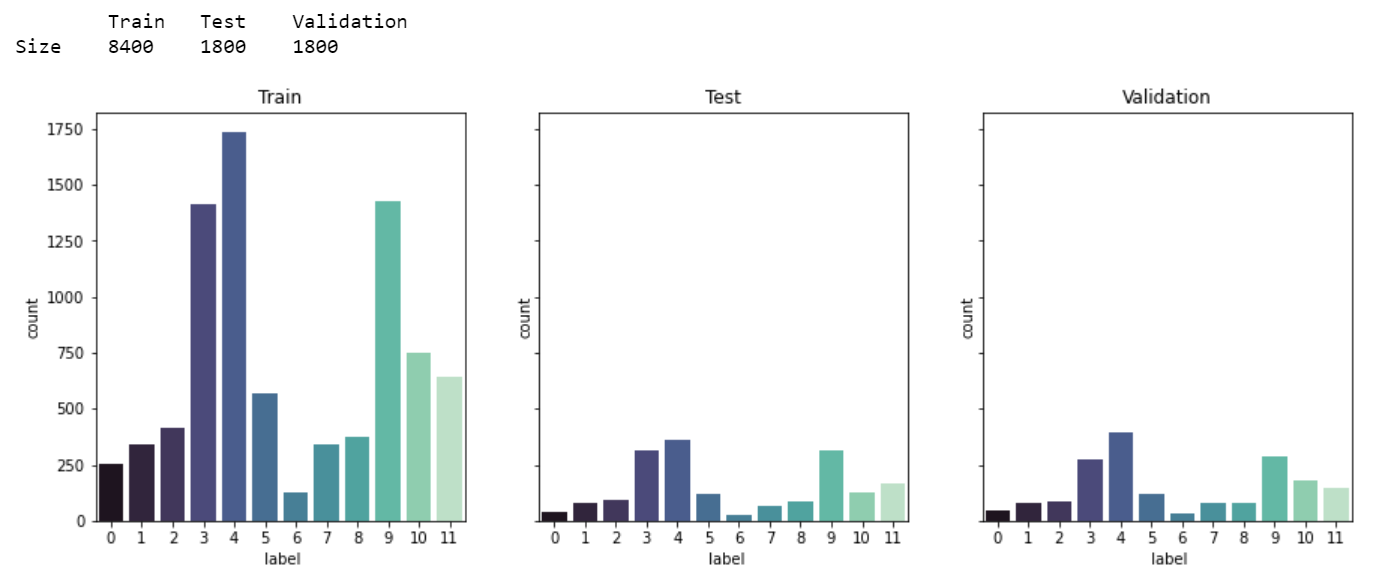
    
</p>

<p align = "center">
    
<b> Figure: Class distribution in train, test and val sets (Source: Assignment 1 from Natural Language Processing Exercises WS2021/2022) </b>
    
</p>

Additionally, it can be seen that during training of every model variation, it manages to achieve high accuracy on training phase, while barely achieves same accuracy during validation and testing phase. We had hopes for dropout as well as L2 regularization to improve generalizing ability of a model. It worked out well with L2Reg in initial runs (10 epochs), the best performing was L2Reg with value 0.01. We trained model with that parameter for additional 20 epochs to get the feeling if it can perform any better. Contrary to our expectations, we could not get a significantly better result w.r.t. accuracy just by training model with best parameters further.

We also observed an improvement over a baseline by training model with different strides and paddings. Seems like model could capture more context from input data with increased stride of convolutional layers. The worst performing model variation was Variation 1 with random weight initialization to embedding layer, which suggests that pretrained weights have a huge impact on a model performance.

In [7]:
%load_ext tensorboard
%tensorboard --logdir 'saves/tb_runs/CNN'

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6007 (pid 6700), started 0:04:37 ago. (Use '!kill 6700' to kill it.)

In [67]:
# make dataframe from tensorboard scalars
import pandas as pd
import os
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator


df = pd.DataFrame(columns = ['Model', 'Validation Accuracy', 'Test Accuracy'])

for f in os.scandir('saves/tb_runs/CNN/'):
    if f.is_dir():
        folder = f.path
    
        event_accumulator = EventAccumulator(folder)
        event_accumulator.Reload()

        val = event_accumulator.Scalars('Accuracy/validation')
        val_acc = max([x.value for x in val])
        test = event_accumulator.Scalars('Test_Accuracy')
        test_acc = max([x.value for x in test])

        df_new = pd.DataFrame({'Model': os.path.basename(f.path), 'Validation Accuracy': val_acc, 'Test Accuracy': test_acc}, index=[0])
        df = pd.concat([df, df_new], ignore_index = True)
    
df.sort_values(by=['Test Accuracy'], ascending=False)

Model  Validation Accuracy  Test Accuracy
7           L2Reg=0.01             0.626111       0.633889
5         L2Reg=0.0001             0.619444       0.627778
9   padding=0_stride=2             0.625556       0.621667
11  padding=1_stride=2             0.620000       0.621667
6          L2Reg=0.001             0.630556       0.620556
10  padding=1_stride=1             0.615000       0.619444
12  padding=2_stride=1             0.613889       0.617778
1          DropOut=0.2             0.621667       0.615556
13  padding=2_stride=2             0.615000       0.615000
0             Baseline             0.611667       0.611667
4          DropOut=0.5             0.612222       0.610000
8   padding=0_stride=1             0.611111       0.610000
2          DropOut=0.3             0.611111       0.609444
3          DropOut=0.4             0.606667       0.607778
14       RandomWeights             0.532778       0.536667

<a name="section-classification-rnn"></a><h2 style="color:rgb(0,120,170)">Task C: Classification with LSTM (10 points)</h2>

<div style="background-color:rgb(224, 243, 255)">

This task implements a document classification model with PyTorch using Long Short-Term Memory (LSTM). This model should be called **`ClassificationRNNModel`** in your code, which contains all various variants as explained later. The schematic architecture of `ClassificationRNNModel` is shown in the figure below. `ClassificationRNNModel` extends `ClassificationAverageModel` by an LSTM layer. 

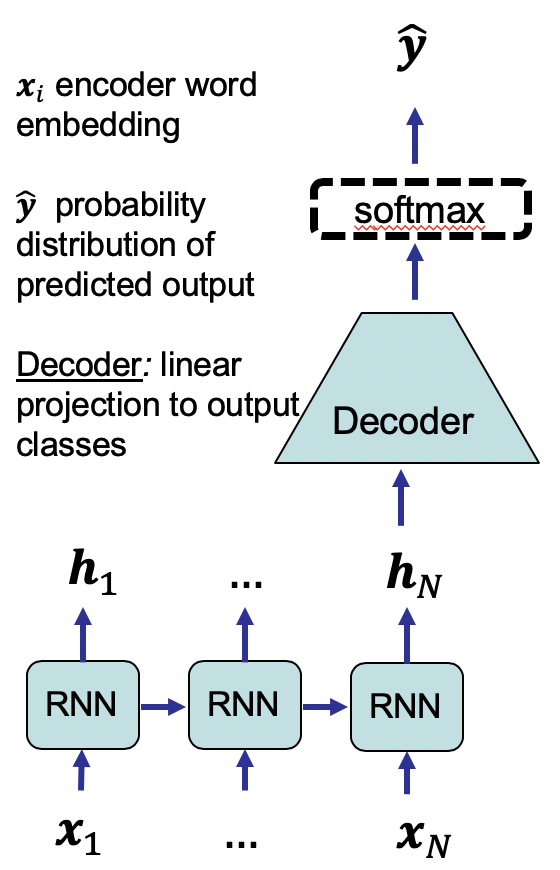

The implementation of `ClassificationRNNModel` covers the following points:

**Baseline model (5 points):** The baseline LSTM model first fetches the corresponding embeddings of the word IDs of a given batch. It then calculates hidden states of the given sequences (documents) with the LSTM model. Finally, the **last hidden state** of LSTM is used as document embedding to predict the probability distribution of the output classes by the decoder (a linear projection) and a softmax layer. A dropout layer is applied to the output of the LSTM.

**Model variations (3 points):** Implement the **three variations** of the baseline LSTM model as explained below. Each variation applies only one change to the baseline architecture, making it possible to study the effect of the change. The code of all variations should be inside `ClassificationRNNModel`, and executing a variation should be done by simply passing the corresponding parameters of the variation to the model. 

- **Variation 1 - Word Embeddings & RNN (1 point).** Select (at least) one of these proposed cases:
  - Freeze the weights of encoder word embeddings (no updates)
  - Initialize the encoder word embeddings randomly instead of using pretrained embeddings. 
  - Increase/decrease the dimension of the hidden state of the RNN.
  - Use GRU instead of LSTM.

- **Variation 2 - Regularization & Optimization (1 point).** Select (at least) one of these proposed cases:
  - Increase/decrease drop out rates and tune the model accordingly.
  - Add L2 weight regularization to the loss function.
  - Use SGD instead of Adam.

- **Variation 3 - Document Embedding (1 point).** Select (at least) one of these proposed cases:
  - Use a Bidirectional LSTM, and set the document embedding as the concatenation of the last state of forward LSTM with the last state of backward LSTM.
  - Calculate the mean of all the intermediary hidden states as the final document embedding.

**Reporting and discussion (2 points)** Report the evaluation results of the baseline model, as well as the ones for all the variations in a table and also in a plot. Discuss which variation(s) appear to be the most effective. Explain your take.

</div>

In [72]:
from torch.utils.tensorboard import SummaryWriter
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import os

In [73]:
class NNTrainLoop:
    def __init__(self, params:object, 
                 model:torch.nn.Module,
                 use_device=True, 
                 use_weight_decay=False):
        '''
        Inputs:
        - params:object: nested dictionary wrapped into class object
        - model:torch.nn.Module: PyTorch model
        - use_device:bool: use CUDA device
        - weight_decay:bool: use L2 regularization 
        
        '''
        
        self.early_stop = False
        self.delta = params.hyperparams['es_delta']
        self.patience = params.hyperparams['es_patience']
        self.ckp_path = params.hyperparams['save_path']
        self.use_device = use_device
        
        self.val_acc_max = np.Inf
        self.counter = 0
        self.best_score = None
        
        self.model = model
        
        if self.use_device:
            self.model = self.model.to(DEVICE)
        
        # loss function and optimizer
        self.optimizer = torch.optim.Adam(self.model.parameters(), 
                                          lr=params.hyperparams['lr'], 
                                          weight_decay=params.model_variations['weight_decay'])

            
        self.criterion = torch.nn.CrossEntropyLoss()
        
        self.batch_size = params.hyperparams['batch_size']
        
        # create writer for tensorboard
        model_name = params.model_variations['model_name']
        self.writer = SummaryWriter(log_dir=f'saves/tb_runs/{model_name[0:3]}/{model_name[4:]}')
    
    def early_stopper(self, val_acc):
        """
        Stops the training if validation accuracy doesn't improve after a given patience.
        """
        model = self.model
        score = val_acc

        if self.best_score is None:
            self.best_score = score
            torch.save(model.state_dict(), self.ckp_path)
            self.val_acc_max = val_acc
            
        elif score < self.best_score + self.delta:
            self.counter += 1
            print(f'EarlyStopper counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            print(f'Validation accuracy increased ({self.val_acc_max:.6f} --> {val_acc:.6f}).  Saving model ...')
            torch.save(model.state_dict(), self.ckp_path)
            self.val_acc_max = val_acc
            self.counter = 0
    
    def evaluate(self, val_dloader, valid_losses):
        
        model = self.model
        
        overall_correct = 0
        model.eval() # evaluate model
        for data, target in val_dloader:
            
            if self.use_device:
                data, target = data.to(DEVICE), target.to(DEVICE)
            
            output = model(data)
            loss = self.criterion(output, target)
            
            y_hat = torch.argmax(output, dim=1)
            overall_correct += torch.sum(y_hat == target)
            valid_losses.append(loss.item())
            
        return overall_correct / len(val_dloader.dataset)
    
    def test(self, test_dloader):
        # load checkpoint if exists
        
        model = self.model
        
        try:
            model.load_state_dict(torch.load(self.ckp_path))
        except FileNotFoundError:
            pass
        
        model.eval() # evaluate model
        
        overall_correct = 0
        for data, target in test_dloader:
            
            if self.use_device:
                data, target = data.to(DEVICE), target.to(DEVICE)
            
            output = model(data)
            loss = self.criterion(output, target)
            
            y_hat = torch.argmax(output, dim=1)
            overall_correct += torch.sum(y_hat == target)
        
        testing_accuracy = overall_correct / len(test_dloader.dataset)
        print(f'Testing Accuracy: {testing_accuracy:.3f}')
        
        # tensorboard
        self.writer.add_scalar('Test_Accuracy', testing_accuracy)
            
        return y_hat

    def train(self, train_dloader, n_epochs=15):
        
        model = self.model
        
        train_losses = []
        valid_losses = []
        test_losses = []

        for epoch in range(1, n_epochs + 1):
            overall_correct = 0
            
            model.train()
            for batch, (data, target) in enumerate(train_dloader, 1):
                self.optimizer.zero_grad()
                
                if self.use_device:
                    data, target = data.to(DEVICE), target.to(DEVICE)
                                
                output = model(data)
                y_hat = torch.argmax(output, dim=1)
                
                loss = self.criterion(output, target)
                overall_correct += torch.sum(y_hat == target)
                
                loss.backward()
                self.optimizer.step()
                
                train_losses.append(loss.item())

            # compute train and val accuracies
            train_accuracy = overall_correct/len(train_dloader.dataset)
            val_accuracy = self.evaluate(val_dloader, valid_losses)

            train_loss = np.average(train_losses)
            valid_loss = np.average(valid_losses)
            
            train_losses, valid_losses = [], []

            print(f'Epoch {epoch}/{n_epochs} | Training Loss: {train_loss:.3f} | Training Accuracy {train_accuracy:.3f} \n',
                  f'Validation Loss: {valid_loss:.3f} | Validation Accuracy: {val_accuracy:.3f}')

            # tensorboard
            self._write_summary(epoch, train_loss, train_accuracy, valid_loss, val_accuracy, model)
            
            self.early_stopper(val_accuracy)

            if self.early_stop == True:
                print(f"Early stopping occured on epoch {epoch} with latest validation accuracy of {val_accuracy:.3f}")
                break
    
    def _write_summary(self, epoch, train_loss, train_accuracy, validation_loss, validation_accuracy, model):
        self.writer.add_scalar('Loss/train', train_loss, epoch)
        self.writer.add_scalar('Accuracy/train', train_accuracy, epoch)
        self.writer.add_scalar('Loss/validation', validation_loss, epoch)
        self.writer.add_scalar('Accuracy/validation', validation_accuracy, epoch)
        
        self.writer.add_histogram('embeddings.weight', model.embeddings.weight, epoch)

In [74]:
DEVICE = torch.device("cuda:0") if torch.cuda.is_available() else torch.device('cpu')
DEVICE

device(type='cpu')

In [75]:
rnn_model_params_dict = dict(    
    # architecture config
    architecture = dict(
        hidden_dim = 256,
        dropout_prob = 0.2 # prob of element to be zeroed
    ),
    # hyperparameters config
    hyperparams = dict(
        batch_size = 64,
        lr = 5e-4,
        es_patience = 5, # number of epochs with no improvement before training stops
        es_delta = 0.0, # min change to count as an improvement
        save_path = './saves/checkpoint_rnn.pt'
    ),    
    # preparing config template for different model variations
    model_variations = dict(
        model_name = 'RNN_Baseline',
        random_embed_weights = False,
        weight_decay = 0,  # L2 regularization for Adam
        bidirectional = False
    ),
    # embedding layer config
    embeddings = dict(
        num_embeddings = glove_floated.shape[0],
        embedding_dim = glove_floated.shape[1]
    )
)

model_params = Structor(rnn_model_params_dict)

In [76]:
train_dloader = DataLoader(train_dataset, batch_size = model_params.hyperparams['batch_size'], drop_last=False, shuffle=True, collate_fn=batch_fn) # drop_last = False: last smaller minibatch is kept; collate_fn = batch_fn: used for padding sequences with shorter length 
val_dloader = DataLoader(val_dataset, batch_size = model_params.hyperparams['batch_size'], drop_last=False, shuffle=False, collate_fn=batch_fn)
test_dloader = DataLoader(test_dataset, batch_size = model_params.hyperparams['batch_size'], drop_last=False, shuffle=False, collate_fn=batch_fn)

In [77]:
class ClassificationRNNModel(torch.nn.Module):
    def __init__(self, params:object, use_device=False):
        super(ClassificationRNNModel, self).__init__()

        self.use_device = use_device
        
        self.num_embeddings = params.embeddings['num_embeddings']
        self.embedding_dim = params.embeddings['embedding_dim']
        self.hidden_dim = params.architecture['hidden_dim']
        self.dropout_prob = params.architecture['dropout_prob']
        
        # Embedding lookup table
        self.embeddings = torch.nn.Embedding(num_embeddings=self.num_embeddings, # size of dictionary 1935
                                             embedding_dim=self.embedding_dim, # WE vector length 200
                                             padding_idx=0)
        # Embedding weights
        if params.model_variations['random_embed_weights']:
            torch.nn.init.uniform_(self.embeddings.weight, -1.0, 1.0) # randomly initialize embedding weights
        else:
            self.embeddings.weight.data.copy_(glove_floated) # start with pretrained weights
        
        # Bidirectional
        if params.model_variations['bidirectional']:
            num_dir = 2 
        else: num_dir = 1
        
        self.lstm = torch.nn.LSTM(self.embedding_dim, self.hidden_dim,  batch_first = True,
                                  bidirectional = params.model_variations['bidirectional'])
        self.linear = torch.nn.Linear(self.hidden_dim*num_dir, len(train_dataset.all_classes())) # (H*D, number of classes = 12)
        self.dropout = torch.nn.Dropout(p = self.dropout_prob)
        
    def forward(self, x):
        embed_batch = batched_sentence_lookup(x, self.embeddings, self.use_device) # (batch_size, document_size, embeddings_dim)
        out, _ = self.lstm(embed_batch) # (batch_size, sequence length, hidden_dim*num_dir)
        h_N = out[:, -1, :] # (batch_size, hidden_dim*num_dir) output of last timestep
        h_N_dropout = self.dropout(h_N)
        logit = self.linear(h_N_dropout) # (batch_size, num_classes)
        return F.softmax(logit, dim = 1)    

In [78]:
model = ClassificationRNNModel(model_params, use_device=False)
trainer = NNTrainLoop(model_params, model)

In [79]:
trainer.train(train_dloader, n_epochs = 15)

Epoch 1/15 | Training Loss: 2.406 | Training Accuracy 0.199 
 Validation Loss: 2.392 | Validation Accuracy: 0.221
Epoch 2/15 | Training Loss: 2.395 | Training Accuracy 0.204 
 Validation Loss: 2.392 | Validation Accuracy: 0.221
Validation accuracy increased (0.220556 --> 0.220556).  Saving model ...
Epoch 3/15 | Training Loss: 2.392 | Training Accuracy 0.210 
 Validation Loss: 2.392 | Validation Accuracy: 0.236
Validation accuracy increased (0.220556 --> 0.236111).  Saving model ...
Epoch 4/15 | Training Loss: 2.358 | Training Accuracy 0.258 
 Validation Loss: 2.340 | Validation Accuracy: 0.262
Validation accuracy increased (0.236111 --> 0.261667).  Saving model ...
Epoch 5/15 | Training Loss: 2.310 | Training Accuracy 0.311 
 Validation Loss: 2.319 | Validation Accuracy: 0.306
Validation accuracy increased (0.261667 --> 0.305556).  Saving model ...
Epoch 6/15 | Training Loss: 2.308 | Training Accuracy 0.308 
 Validation Loss: 2.329 | Validation Accuracy: 0.297
EarlyStopper counter: 1 

In [80]:
trainer.test(test_dloader)

Testing Accuracy: 0.312


tensor([4, 4, 4, 3, 3, 3, 3, 4])

### Variation 1a: Tuning the dimension of the hidden state of the RNN

In [81]:
tuning_params_hidden_dim = [128, 512]
variation1a_params = copy.deepcopy(model_params)

for tunable in tuning_params_hidden_dim:
    variation1a_params.architecture['hidden_dim'] = tunable
    print(f'Training with hidden dimension = {tunable}')

    variation1a_params.model_variations['model_name'] = f'RNN_Variation1a_hiddendim={tunable}'
    variation1a_params.hyperparams['save_path'] = f'./saves/checkpoint_rnn_var1a_hiddendim={tunable}.pt'
    
    model = ClassificationRNNModel(variation1a_params, use_device=False)
    trainer = NNTrainLoop(variation1a_params, model)
    
    trainer.train(train_dloader, n_epochs=15)
    trainer.test(test_dloader)
    print('\n')

Training with hidden dimension = 128
Epoch 1/15 | Training Loss: 2.415 | Training Accuracy 0.192 
 Validation Loss: 2.395 | Validation Accuracy: 0.221
Epoch 2/15 | Training Loss: 2.395 | Training Accuracy 0.206 
 Validation Loss: 2.393 | Validation Accuracy: 0.221
Validation accuracy increased (0.220556 --> 0.220556).  Saving model ...
Epoch 3/15 | Training Loss: 2.393 | Training Accuracy 0.208 
 Validation Loss: 2.394 | Validation Accuracy: 0.227
Validation accuracy increased (0.220556 --> 0.226667).  Saving model ...
Epoch 4/15 | Training Loss: 2.357 | Training Accuracy 0.260 
 Validation Loss: 2.327 | Validation Accuracy: 0.304
Validation accuracy increased (0.226667 --> 0.304444).  Saving model ...
Epoch 5/15 | Training Loss: 2.305 | Training Accuracy 0.313 
 Validation Loss: 2.279 | Validation Accuracy: 0.368
Validation accuracy increased (0.304444 --> 0.368333).  Saving model ...
Epoch 6/15 | Training Loss: 2.277 | Training Accuracy 0.346 
 Validation Loss: 2.318 | Validation Acc

### Variation 1b: Initialize embeddings' weights randomly

In [82]:
variation1b_params = copy.deepcopy(model_params)
variation1b_params.model_variations['model_name'] = 'RNN_Variation1b_randomweights'

variation1b_params.hyperparams['save_path'] = './saves/checkpoint_rnn_var1b.pt'
variation1b_params.model_variations['random_embed_weights'] = True

model = ClassificationRNNModel(variation1b_params, use_device=False)
trainer = NNTrainLoop(variation1b_params, model)
trainer.train(train_dloader, n_epochs=15)
trainer.test(test_dloader)

Epoch 1/15 | Training Loss: 2.406 | Training Accuracy 0.203 
 Validation Loss: 2.396 | Validation Accuracy: 0.220
Epoch 2/15 | Training Loss: 2.366 | Training Accuracy 0.243 
 Validation Loss: 2.315 | Validation Accuracy: 0.308
Validation accuracy increased (0.220000 --> 0.307778).  Saving model ...
Epoch 3/15 | Training Loss: 2.319 | Training Accuracy 0.300 
 Validation Loss: 2.339 | Validation Accuracy: 0.285
EarlyStopper counter: 1 out of 5
Epoch 4/15 | Training Loss: 2.356 | Training Accuracy 0.262 
 Validation Loss: 2.376 | Validation Accuracy: 0.228
EarlyStopper counter: 2 out of 5
Epoch 5/15 | Training Loss: 2.337 | Training Accuracy 0.273 
 Validation Loss: 2.340 | Validation Accuracy: 0.277
EarlyStopper counter: 3 out of 5
Epoch 6/15 | Training Loss: 2.329 | Training Accuracy 0.287 
 Validation Loss: 2.335 | Validation Accuracy: 0.278
EarlyStopper counter: 4 out of 5
Epoch 7/15 | Training Loss: 2.326 | Training Accuracy 0.289 
 Validation Loss: 2.328 | Validation Accuracy: 0.2

tensor([4, 4, 4, 3, 3, 4, 4, 4])

### Variation 2a: Tuning the dropout rate

In [83]:
tuning_params_dropout = [0.1, 0.3, 0.5]
variation2a_params = copy.deepcopy(model_params)

for tunable in tuning_params_dropout:
    variation2a_params.architecture['dropout'] = tunable
    print(f'Training with dropout rate = {tunable}')

    variation2a_params.model_variations['model_name'] = f'RNN_Variation2a_dropoutrate={tunable}'
    variation2a_params.hyperparams['save_path'] = f'./saves/checkpoint_rnn_var2a_dropoutrate={tunable}.pt'
    
    model = ClassificationRNNModel(variation2a_params, use_device=False)
    trainer = NNTrainLoop(variation2a_params, model)
    
    trainer.train(train_dloader, n_epochs=15)
    trainer.test(test_dloader)
    print('\n')

Training with dropout rate = 0.1
Epoch 1/15 | Training Loss: 2.407 | Training Accuracy 0.197 
 Validation Loss: 2.392 | Validation Accuracy: 0.221
Epoch 2/15 | Training Loss: 2.394 | Training Accuracy 0.205 
 Validation Loss: 2.392 | Validation Accuracy: 0.221
Validation accuracy increased (0.220556 --> 0.220556).  Saving model ...
Epoch 3/15 | Training Loss: 2.392 | Training Accuracy 0.209 
 Validation Loss: 2.391 | Validation Accuracy: 0.227
Validation accuracy increased (0.220556 --> 0.226667).  Saving model ...
Epoch 4/15 | Training Loss: 2.345 | Training Accuracy 0.271 
 Validation Loss: 2.342 | Validation Accuracy: 0.276
Validation accuracy increased (0.226667 --> 0.276111).  Saving model ...
Epoch 5/15 | Training Loss: 2.331 | Training Accuracy 0.271 
 Validation Loss: 2.340 | Validation Accuracy: 0.281
Validation accuracy increased (0.276111 --> 0.280556).  Saving model ...
Epoch 6/15 | Training Loss: 2.344 | Training Accuracy 0.268 
 Validation Loss: 2.335 | Validation Accurac

### Variation 2b: Add L2 weight regularization to the loss function and tune its coefficient

In [84]:
tuning_params = [0.00001, 0.0001, 0.01]
variation2b_params = copy.deepcopy(model_params)

for tunable in tuning_params:
    print(f'Training with weight_decay = {tunable}')
    variation2b_params.model_variations['weight_decay'] = tunable
    
    variation2b_params.model_variations['model_name'] = f'RNN_Variation2b_L2={tunable}'
    variation2b_params.hyperparams['save_path'] = f'./saves/checkpoint_rnn_var2b_L2={tunable}.pt'
    
    model = ClassificationRNNModel(variation2b_params, use_device=False)
    trainer = NNTrainLoop(variation2b_params, model)
    
    trainer.train(train_dloader, n_epochs=15)
    trainer.test(test_dloader)
    print('\n')

Training with weight_decay = 1e-05
Epoch 1/15 | Training Loss: 2.408 | Training Accuracy 0.202 
 Validation Loss: 2.393 | Validation Accuracy: 0.221
Epoch 2/15 | Training Loss: 2.395 | Training Accuracy 0.203 
 Validation Loss: 2.393 | Validation Accuracy: 0.221
Validation accuracy increased (0.220556 --> 0.220556).  Saving model ...
Epoch 3/15 | Training Loss: 2.395 | Training Accuracy 0.205 
 Validation Loss: 2.395 | Validation Accuracy: 0.221
Validation accuracy increased (0.220556 --> 0.220556).  Saving model ...
Epoch 4/15 | Training Loss: 2.393 | Training Accuracy 0.207 
 Validation Loss: 2.401 | Validation Accuracy: 0.167
EarlyStopper counter: 1 out of 5
Epoch 5/15 | Training Loss: 2.391 | Training Accuracy 0.209 
 Validation Loss: 2.392 | Validation Accuracy: 0.227
Validation accuracy increased (0.220556 --> 0.226667).  Saving model ...
Epoch 6/15 | Training Loss: 2.376 | Training Accuracy 0.239 
 Validation Loss: 2.378 | Validation Accuracy: 0.212
EarlyStopper counter: 1 out o

### Variation 3: Bidirectional LSTM

In [89]:
variation3_params = copy.deepcopy(model_params)
variation3_params.model_variations['model_name'] = 'RNN_Variation3_bidirectional'

variation3_params.model_variations['bidirectional'] = True
variation3_params.hyperparams['save_path'] = './saves/checkpoint_rnn_var3.pt'

model = ClassificationRNNModel(variation3_params, use_device=False)
trainer = NNTrainLoop(variation3_params, model)
trainer.train(train_dloader, n_epochs=15)
trainer.test(test_dloader)

Epoch 1/15 | Training Loss: 2.407 | Training Accuracy 0.200 
 Validation Loss: 2.394 | Validation Accuracy: 0.221
Epoch 2/15 | Training Loss: 2.392 | Training Accuracy 0.203 
 Validation Loss: 2.391 | Validation Accuracy: 0.221
Validation accuracy increased (0.220556 --> 0.220556).  Saving model ...
Epoch 3/15 | Training Loss: 2.388 | Training Accuracy 0.224 
 Validation Loss: 2.394 | Validation Accuracy: 0.217
EarlyStopper counter: 1 out of 5
Epoch 4/15 | Training Loss: 2.375 | Training Accuracy 0.239 
 Validation Loss: 2.388 | Validation Accuracy: 0.226
Validation accuracy increased (0.220556 --> 0.226111).  Saving model ...
Epoch 5/15 | Training Loss: 2.364 | Training Accuracy 0.246 
 Validation Loss: 2.387 | Validation Accuracy: 0.223
EarlyStopper counter: 1 out of 5
Epoch 6/15 | Training Loss: 2.356 | Training Accuracy 0.261 
 Validation Loss: 2.384 | Validation Accuracy: 0.223
EarlyStopper counter: 2 out of 5
Epoch 7/15 | Training Loss: 2.346 | Training Accuracy 0.265 
 Validatio

tensor([9, 3, 4, 9, 3, 9, 9, 9])

### Best parameters

In [105]:
best_params = copy.deepcopy(model_params)
best_params.model_variations['model_name'] = 'RNN_Best_Parameters'

best_params.hyperparams['save_path'] = './saves/checkpoint_rnn_bestparams.pt'

best_params.model_variations['bidirectional'] = True
best_params.architecture['dropout'] = 0.1
best_params.architecture['hidden_dim'] = 128
best_params.model_variations['random_embed_weights'] = True
best_params.model_variations['weight_decay'] = 0.00001

model = ClassificationRNNModel(best_params, use_device=False)
trainer = NNTrainLoop(best_params, model)
trainer.train(train_dloader, n_epochs=15)
trainer.test(test_dloader)

Epoch 1/20 | Training Loss: 2.411 | Training Accuracy 0.198 
 Validation Loss: 2.393 | Validation Accuracy: 0.221
Epoch 2/20 | Training Loss: 2.391 | Training Accuracy 0.214 
 Validation Loss: 2.379 | Validation Accuracy: 0.249
Validation accuracy increased (0.220556 --> 0.248889).  Saving model ...
Epoch 3/20 | Training Loss: 2.314 | Training Accuracy 0.305 
 Validation Loss: 2.303 | Validation Accuracy: 0.311
Validation accuracy increased (0.248889 --> 0.311111).  Saving model ...
Epoch 4/20 | Training Loss: 2.243 | Training Accuracy 0.390 
 Validation Loss: 2.231 | Validation Accuracy: 0.403
Validation accuracy increased (0.311111 --> 0.402778).  Saving model ...
Epoch 5/20 | Training Loss: 2.185 | Training Accuracy 0.442 
 Validation Loss: 2.224 | Validation Accuracy: 0.397
EarlyStopper counter: 1 out of 5
Epoch 6/20 | Training Loss: 2.183 | Training Accuracy 0.440 
 Validation Loss: 2.185 | Validation Accuracy: 0.437
Validation accuracy increased (0.402778 --> 0.436667).  Saving m

tensor([9, 9, 4, 3, 9, 3, 3, 3])

### Report and Discussion

As can be seen from the tensorboard summaries, with regard to the hidden dimension of the LSTM layer the model with fewest parameters (128) performed best and the one with the most parameters worst.

Initializing the embedding weights randomly performed very poorely. However in former runs we observed that this is very inconsistent, in some runs the model with random weights performed best.

With regard to the dropout rate the models with 0.1 and 0.3 perform similarly here and the baseline model with 0.2 as well as the model with 0.4 perform a bit worse.

L2 weight regularization with higher L2 penalties seems to hinder the RNN from learning altogether. When the parameter is set to 1e-5 however this leads to a better performance than with baseline model achieves.

The bidirectional LSTM performs quite similarly to the baseline. The input is processed twice, once from left to right and a second time in reversed order. This often leads to improvements in sequence to sequence tasks, as the prediction at every timestep uses information from the past and the future. However also many-to-one tasks can make use of the additional context that is provided. Of course this comes at higher computational cost compared to the baseline model.

Lastly a model with a combiniation of parameters that seem to perform well was trained. This indeed manages to outperform all other models.

Altogether the RNN performs a lot worse than the CNN. RNNs are well suited for tasks were sequential information is important. For the document classification task at hand this is not that important.

In [8]:
%load_ext tensorboard
%tensorboard --logdir 'saves/tb_runs/RNN'

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 6689), started 0:05:57 ago. (Use '!kill 6689' to kill it.)

In [107]:
# make dataframe from tensorboard scalars
df = pd.DataFrame(columns = ['Model', 'Validation Accuracy', 'Test Accuracy'])

for f in os.scandir('saves/tb_runs/RNN/'):
    if f.is_dir():
        folder = f.path
    
        event_accumulator = EventAccumulator(folder)
        event_accumulator.Reload()

        val = event_accumulator.Scalars('Accuracy/validation')
        val_acc = max([x.value for x in val])
        test = event_accumulator.Scalars('Test_Accuracy')
        test_acc = max([x.value for x in test])

        df_new = pd.DataFrame({'Model': os.path.basename(f.path), 'Validation Accuracy': val_acc, 'Test Accuracy': test_acc}, index=[0])
        df = pd.concat([df, df_new], ignore_index = True)
    
df.sort_values(by=['Test Accuracy'], ascending=False)

Model Validation Accuracy Test Accuracy
9               Best_Parameters            0.441111      0.462222
8     Variation1a_hiddendim=128            0.368333      0.372222
10  Variation2a_dropoutrate=0.1            0.351667      0.361111
3   Variation2a_dropoutrate=0.3            0.333333      0.360556
0          Variation2b_L2=1e-05            0.353333      0.352778
2   Variation2a_dropoutrate=0.5            0.336111      0.320556
4                      Baseline            0.305556      0.311667
6      Variation3_bidirectional            0.312222      0.311111
7     Variation1b_randomweights            0.307778      0.298333
1     Variation1a_hiddendim=512            0.287222      0.293889
5         Variation2b_L2=0.0001            0.220556      0.200556
11          Variation2b_L2=0.01            0.220556      0.200556

In [4]:
!tensorboard dev upload --logdir 'saves/tb_runs' \
  --name "NLP DL: Assignment 1 - Kolesnichenko, Ratz" \
  --description "Training results document classification with CNN and LSTM" \
  --one_shot

TensorFlow installation not found - running with reduced feature set.

New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/1byiMJsdTOa2sG4f6pVy8w/

[2022-04-18T11:06:52] Started scanning logdir.
[2022-04-18T11:06:57] Total uploaded: 1264 scalars, 307 tensors (2.1 MB), 0 binary objects
[2022-04-18T11:06:57] Done scanning logdir.


Done. View your TensorBoard at https://tensorboard.dev/experiment/1byiMJsdTOa2sG4f6pVy8w/


In [ ]:
#!tensorboard dev delete --experiment_id 7luZzGyyQtOTxmADUju35g